In [54]:
!pip install -U scikit-learn

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, average_precision_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

warnings.filterwarnings("ignore")
plt.style.use('bmh')

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd

file_path = '/content/drive/MyDrive/creditcard.csv'
data = pd.read_csv(file_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [59]:
totalNa = data.isnull().sum().sort_values(ascending=False)
pd.concat([totalNa], axis=1, keys=["Total"]).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Not Fradulent: 284315
Fradulent: 492
Percent Fradulent: 0.17304750013189596


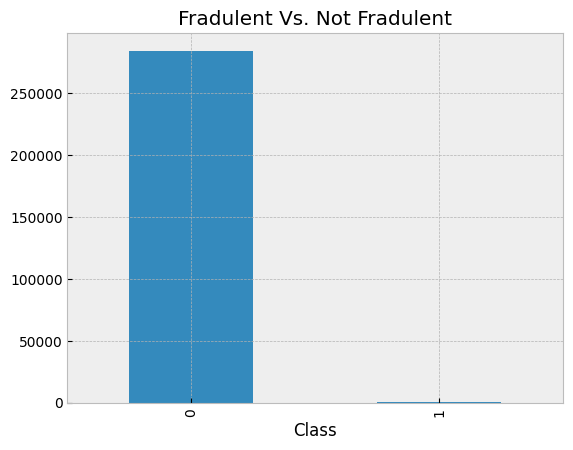

In [60]:
target = data["Class"].value_counts()
print('Not Fradulent:', target[0])
print('Fradulent:', target[1])
print('Percent Fradulent:', (target[1] / target[0])*100)

target.plot(kind='bar', title='Fradulent Vs. Not Fradulent');

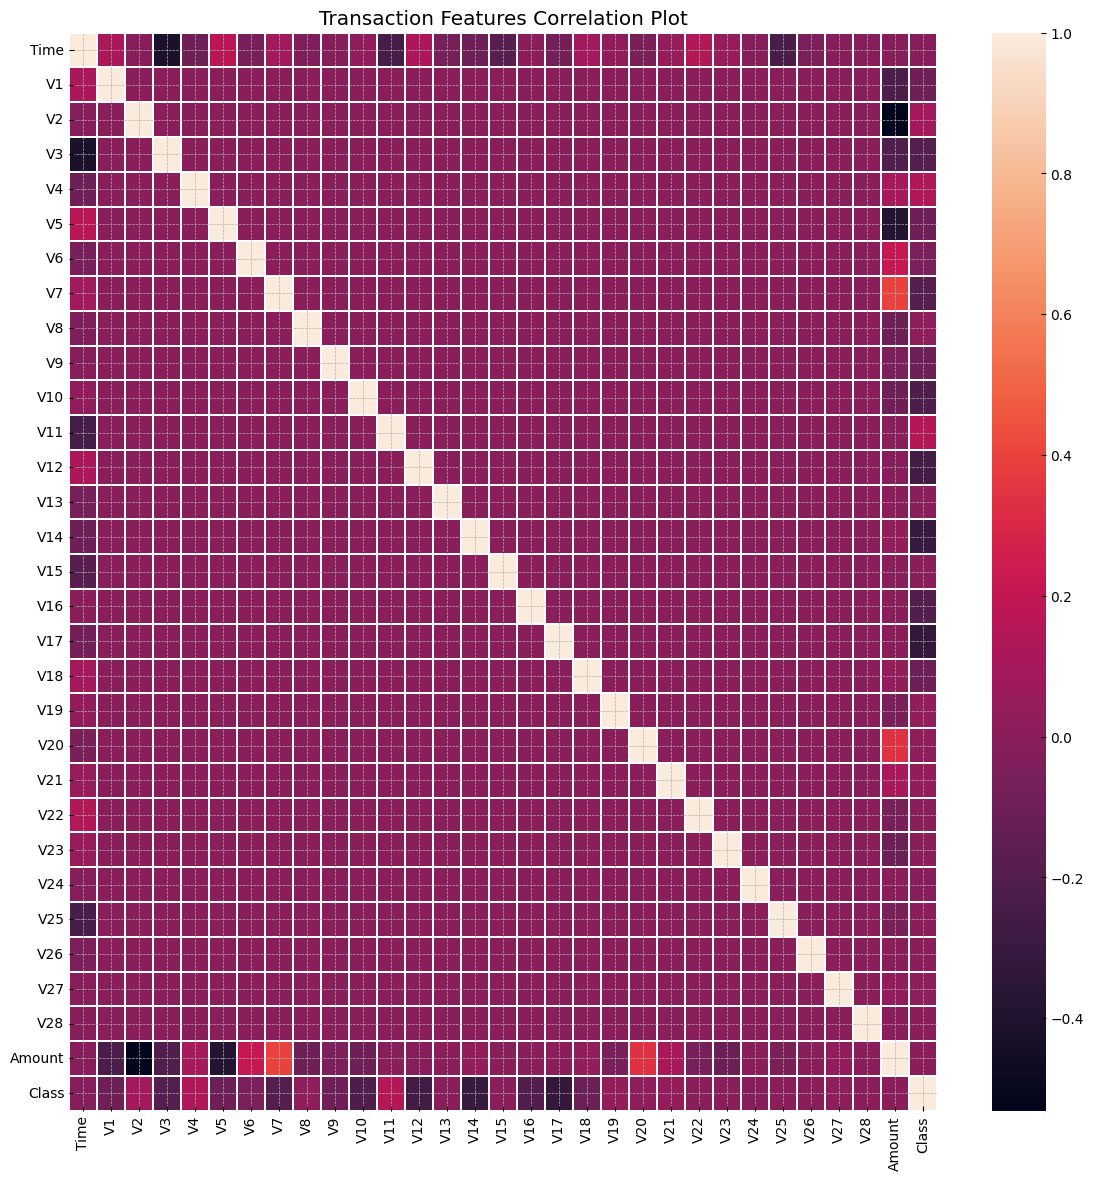

In [61]:
plt.figure(figsize = (14,14))
plt.title('Transaction Features Correlation Plot')
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1)
plt.show()

PCA transformation revealed that there were not significant correlations among the variables in the dataset.

Exceptions:

1. V2 and V5 showed a negative correlation with Amount.
2. V20 and V7 showed a positive correlation with Amount.

<Figure size 640x480 with 0 Axes>

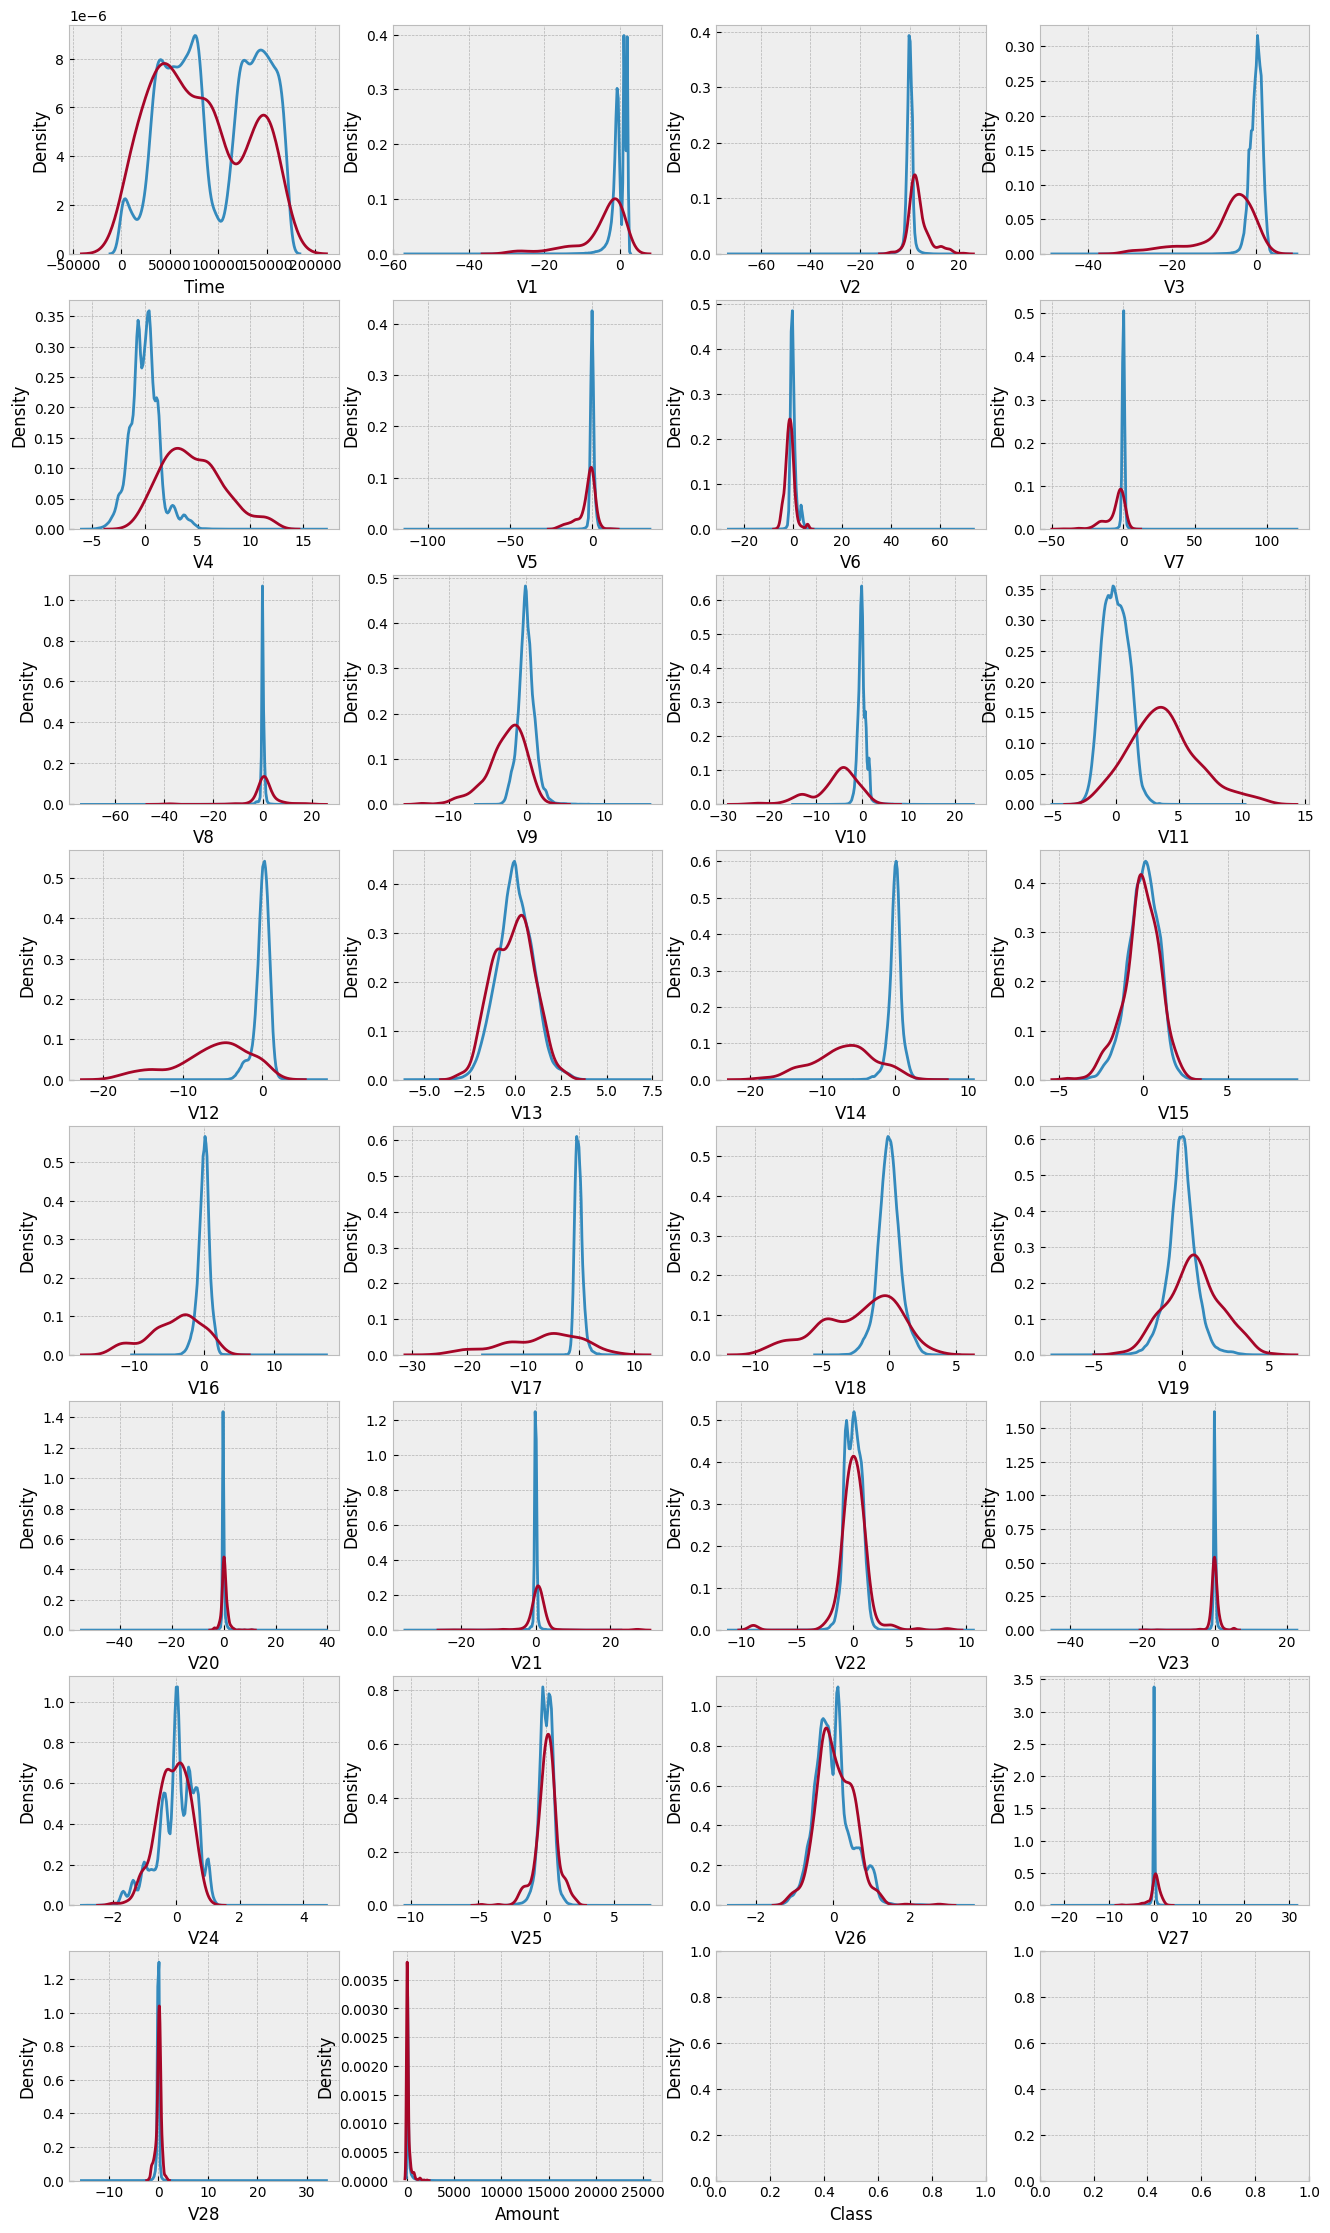

In [62]:
col = data.columns.values

notFraud = data.loc[data["Class"]==0]
fraud = data.loc[data["Class"]==1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

i=0
for feature in col:
    i += 1
    plt.subplot(8,4,i)
    plt.xlabel(feature)
    sns.kdeplot(notFraud[feature], label="Not Fraud")
    sns.kdeplot(fraud[feature], label="Fraud")
    plt.xlabel(feature)
plt.show()

[KDE PLOT]

In normal transactions, most features are concentrated around zero.

-> Most features are distributed around the mean value (around zero).

For fraudulent transactions, features such as V11 and V14 exhibit highly skewed distributions.

In [63]:
y = data.Class
predFeatures = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19','V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']
X = data[predFeatures]

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [64]:
from collections import Counter

counter = Counter(train_y)
print("Before oversampling:", counter)


smote = SMOTE(k_neighbors=5)  # k_neighbors=5
X_train_sm, y_train_sm = smote.fit_resample(train_X, train_y)

print("After oversampling:", Counter(y_train_sm))


Before oversampling: Counter({0: 213233, 1: 372})
After oversampling: Counter({0: 213233, 1: 213233})


Fraudulent transactions are not more densely clustered than non-fraudulent transactions, and the data variance is relatively large. Therefore, I set a large value for k_neighbors in order to use a greater number of neighbors around the minority class data points.

Now that oversampling has been performed, let's analyze the data using various methods.

Firstly, we'll use ANN for analysis.


In [65]:
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(val_X)


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_sm.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_sm_scaled, y_train_sm, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob_A = model.predict(X_test_scaled)

y_pred_A = (y_pred_prob > 0.5).astype(int)

print(classification_report(val_y, y_pred_A))

print(classification_report(val_y, y_pred_A))



Epoch 1/10
10662/10662 [==============================] - 34s 3ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0147 - val_accuracy: 0.9966
Epoch 2/10
10662/10662 [==============================] - 34s 3ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0074 - val_accuracy: 0.9982
Epoch 3/10
10662/10662 [==============================] - 35s 3ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.0066 - val_accuracy: 0.9987
Epoch 4/10
10662/10662 [==============================] - 32s 3ms/step - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0055 - val_accuracy: 0.9988
Epoch 5/10
10662/10662 [==============================] - 33s 3ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0063 - val_accuracy: 0.9986
Epoch 6/10
10662/10662 [==============================] - 35s 3ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0032 - val_accuracy: 0.9999
Epoch 7/10
10662/10662 [==============================] - 33s 3ms/step - loss: 0.0112 - accuracy: 0.9970 - val_loss: 0

In [66]:
# AUROC와 AUPRC 계산 및 출력
auroc_A = roc_auc_score(val_y, y_pred_prob_A)
auprc_A = average_precision_score(val_y, y_pred_prob_A)

print(f"AUROC: {auroc_A}")
print(f"AUPRC: {auprc_A}")


AUROC: 0.9655505261528938
AUPRC: 0.7597203277409637


# Let's do RandomForeset

In [67]:
clf = RandomForestClassifier(n_jobs=4, random_state=1, criterion='gini', n_estimators=100, verbose=False)

clf.fit(X_train_sm, y_train_sm)

preds_y_R = clf.predict(val_X)
preds_y_prob_R = clf.predict_proba(val_X)[:, 1]

accuracy = accuracy_score(val_y, preds_y_R)
print("Accuracy:", accuracy)

Accuracy: 0.9995365298727564


In [69]:
auroc_R = roc_auc_score(val_y, preds_y_prob_R)
auprc_R = average_precision_score(val_y, preds_y_prob_R)

print(f"AUROC: {auroc_R}")
print(f"AUPRC: {auprc_R}")

AUROC: 0.9696677194413963
AUPRC: 0.8483272419092129


Out of 120 fraudulent transactions, 101 were correctly detected.
 However, there were 14 cases where non-fraudulent transactions were incorrectly classified as fraudulent.

Interpreting this, the model shows high accuracy and ROC-AUC scores, but it tends to incorrectly classify non-fraudulent transactions as fraudulent.









#Let's use XGBoost at this time.

In [76]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4, random_state=1, objective='binary:logistic')

model.fit(X_train_sm, y_train_sm, early_stopping_rounds=5, eval_set=[(X_train_sm, y_train_sm)], verbose=False)

xgb_preds_y_prob = model.predict_proba(val_X)[:, 1]  # 양성 클래스에 대한 예측 확률
xgb_preds_y = model.predict(val_X)

binary_preds = [round(pred) for pred in xgb_preds_y]


In [81]:
xgb_preds_y_prob = model.predict_proba(val_X)[:, 1]
auroc_X = roc_auc_score(val_y, xgb_preds_y_prob)
auprc_X = average_precision_score(val_y, xgb_preds_y_prob)

print(f"AUROC: {auroc_X}")
print(f"AUPRC: {auprc_X}")


AUROC: 0.9712603049998594
AUPRC: 0.8580273829647512


It exhibits similar accuracy to RandomForest, but it has a higher tendency to predict credit card transactions as fraudulent.

In [89]:
# 각 모델의 AUROC와 AUPRC 값을 저장합니다.
results = {
    "Model": ["Artificial Neural Network", "Random Forest","XGBoost" ],
    "AUROC": [auroc_A, auroc_R, auroc_X],
    "AUPRC": [auprc_A, auprc_R, auprc_X]
}

# 결과를 DataFrame으로 변환합니다.
import pandas as pd
results_df = pd.DataFrame(results)

# 결과를 출력합니다.



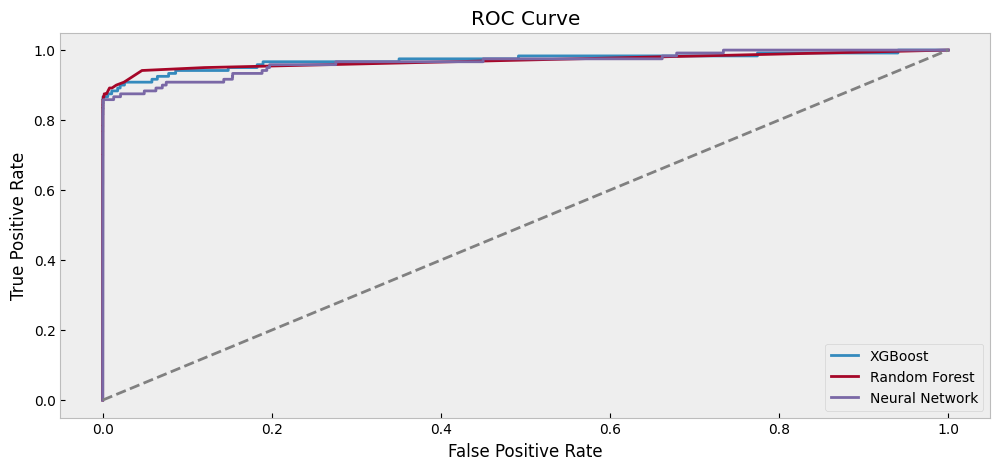

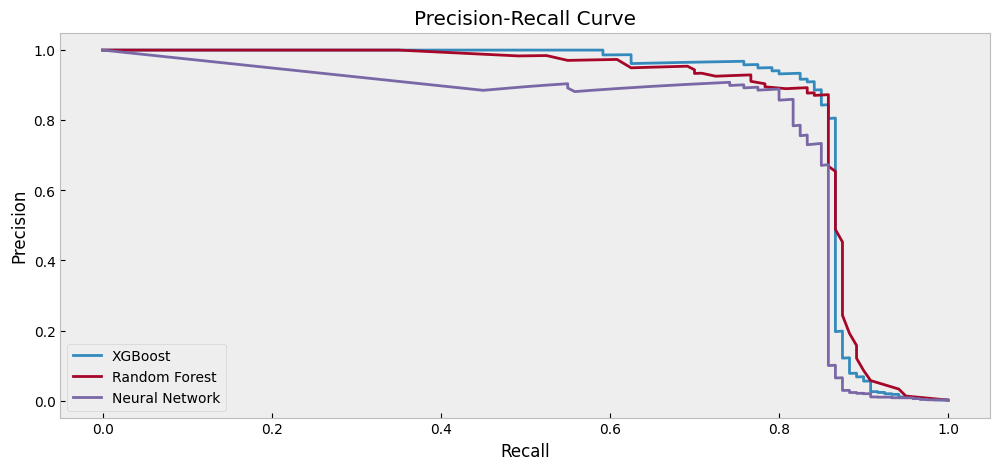

                       Model     AUROC     AUPRC
0  Artificial Neural Network  0.965551  0.759720
1              Random Forest  0.969668  0.848327
2                    XGBoost  0.971260  0.858027


In [90]:
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC 곡선 그리기
plt.figure(figsize=(12, 5))
for model_name, y_prob in zip(["XGBoost", "Random Forest", "Neural Network"], [xgb_preds_y_prob, preds_y_prob_R, y_pred_prob_A]):
    fpr, tpr, _ = roc_curve(val_y, y_prob)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# PRC 그래프 출력
plt.figure(figsize=(12, 5))
for model_name, y_prob in zip(["XGBoost", "Random Forest", "Neural Network"], [xgb_preds_y_prob, preds_y_prob_R, y_pred_prob_A]):
    precision, recall, _ = precision_recall_curve(val_y, y_prob)
    plt.plot(recall, precision, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()
print(results_df)